## Financial Modelling Tasks



### Question 1


1.     Complete the following tasks under this assignment. 

- Download one-year INFY, and RIL stock prices from National Stock Exchange
- Compute the returns for both.
- Fit the return series separately to Generalized Gaussian distribution if you can or fit the normal distribution.
- Fit the T-Copula with the return series. You may use the `copulae` package for the same or your own.
- Construct a portfolio with some random weights.
- Simulate 10,000 or more random returns of your portfolio using copula
- And calculate the maximum loss you may have in a day that you can say with 95% confidence.

In [5]:
# Load Packages
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
#import copulae as cp
from datetime import datetime, date
#from scipy.stats import norm
#from copulae import StudentCopula

In [62]:
#Download one year INFY, and RIL stock prices form National Stock Exchange of India
df = yf.download(['INFY.NS','RELIANCE.NS'], start=datetime(2023, 1, 1), end=datetime(2023, 12, 31))
df.head()

[*********************100%%**********************]  2 of 2 completed


Price        Adj Close                    Close                     High  \
Ticker         INFY.NS  RELIANCE.NS     INFY.NS  RELIANCE.NS     INFY.NS   
Date                                                                       
2020-01-01  668.733704  1360.645142  736.849976  1380.276611  740.000000   
2020-01-02  666.782471  1383.809448  734.700012  1403.775024  740.799988   
2020-01-03  677.037964  1385.476807  746.000000  1405.466553  748.000000   
2020-01-06  670.548889  1353.344482  738.849976  1372.870605  753.799988   
2020-01-07  660.611145  1374.165283  727.900024  1393.991699  742.599976   

Price                           Low                     Open               \
Ticker      RELIANCE.NS     INFY.NS  RELIANCE.NS     INFY.NS  RELIANCE.NS   
Date                                                                        
2020-01-01  1396.277466  732.549988  1376.527954  735.000000  1387.957031   
2020-01-02  1408.941040  730.900024  1382.471069  738.900024  1382.471069   
2020-01-03  1409.581055  733.900024  1392.528687  733.900024  1401.671997   
2020-01-06  1397.008911  736.500000  1369.670410  746.099976  1389.785767   
2020-01-07  1403.043579  725.099976  1383.842529  738.000000  1388.871338   

Price        Volume              
Ticker      INFY.NS RELIANCE.NS  
Date                             
2020-01-01  2112415     7002234  
2020-01-02  5658200     8855158  
2020-01-03  7882938    10492349  
2020-01-06  6519403    12259588  
2020-01-07  7899363     8341811

In [63]:
# Closing price
df2 = df['Adj Close']
df2.head()


Ticker,INFY.NS,RELIANCE.NS
Date,,
2020-01-01,668.733704,1360.645142
2020-01-02,666.782471,1383.809448
2020-01-03,677.037964,1385.476807
2020-01-06,670.548889,1353.344482
2020-01-07,660.611145,1374.165283


In [122]:
#Log Returns on the data (instead of returns itself based on portfolio optimization ipynb)
pct_change = df2.pct_change().apply(lambda x: np.log(1+x)).dropna()
pct_change.head()
df_returns = pct_change

In [143]:
cov_matrix = pct_change.cov()

In [112]:
# Calculate the return on a yearly basis
ind_er = pct_change.mean() 
ind_er


Ticker
INFY.NS        0.002209
RELIANCE.NS    0.001175
dtype: float64

In [113]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df2.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Ticker
INFY.NS        0.397739
RELIANCE.NS    0.467323
dtype: float64

In [114]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Ticker,,
INFY.NS,0.002209,0.397739
RELIANCE.NS,0.001175,0.467323


In [147]:
from scipy.stats import norm, gennorm

#Fit return series to Generalized Gaussian distribution
def fit_gennorm(returns):
    params = gennorm.fit(returns)
    return params

def fit_norm(returns):
    params = norm.fit(returns)
    return params

infy_params = fit_gennorm(df_returns['INFY.NS'])
ril_params = fit_gennorm(df_returns['RELIANCE.NS'])



In [154]:
infy_params2 = fit_norm(df_returns['INFY.NS'])
ril_params2 = fit_norm(df_returns['RELIANCE.NS'])

# Print the parameters of the fitted normal distribution
mean_infy, std_infy = infy_params2
mean_ril, std_ril = ril_params2

print("INFY Mean:", mean_infy, "Standard Deviation:", std_infy)
print("RIL Mean:", mean_ril, "Standard Deviation:", std_ril)

INFY Mean: 0.0022094663664043823 Standard Deviation: 0.025104664460966375
RIL Mean: 0.0011748812501408083 Standard Deviation: 0.029496685626314786


In [128]:
from copulae import TCopula

# Fit T-Copula
t_copula = TCopula(dim=2)
t_copula.fit(df_returns)

#print("T-Copula parameters:")
#print("Correlation matrix:\n", t_copula.correlation)
#print("Degrees of freedom:", t_copula.df)

Ticker     INFY.NS  RELIANCE.NS
count   249.000000   249.000000
mean      0.500000     0.500000
std       0.288097     0.288097
min       0.004000     0.004000
25%       0.252000     0.252000
50%       0.500000     0.500000
75%       0.748000     0.748000
max       0.996000     0.996000


In [148]:
# Construct a portfolio with random weights
num_assets = len(df2.columns)
weights = np.random.random(num_assets)
weights /= np.sum(weights)
print(f"Portfolio weights: {weights}")

Portfolio weights: [0.38946384 0.61053616]


In [149]:
# Simulate 10,000 random returns of the portfolio using copula
n_simulations = 10000
simulated_returns = t_copula.random(n_simulations)


In [157]:
# Convert uniform variates to actual returns using inverse CDF of Generalized Gaussian
infy_sim_returns = gennorm.ppf(simulated_returns.iloc[:, 0], *infy_params)
ril_sim_returns = gennorm.ppf(simulated_returns.iloc[:, 1], *ril_params)

# Calculate portfolio returns
portfolio_returns = weights[0] * infy_sim_returns + weights[1] * ril_sim_returns

In [156]:
# Transform the copula samples back to the original distributions - Normal Distribution
simulated_infy_returns = norm.ppf(simulated_returns.iloc[:, 0], mean_infy, std_infy)
simulated_ril_returns = norm.ppf(simulated_returns.iloc[:, 1], mean_ril, std_ril)

# Combine the returns into a portfolio
portfolio_returns2 = weights[0] * simulated_infy_returns + weights[1] * simulated_ril_returns


In [161]:
# Calculate the maximum loss with 95% confidence (Value at Risk) for Generalized Gaussian
var_95_1 = np.percentile(portfolio_returns, 5)
print(f"Value at Risk (95% confidence): {-var_95_1:.4f}")
print(f"The maximum loss you may have in a day with 95% confidence is {-var_95_1*100:.2f}%")


Value at Risk (95% confidence): 0.0331
The maximum loss you may have in a day with 95% confidence is 3.31%


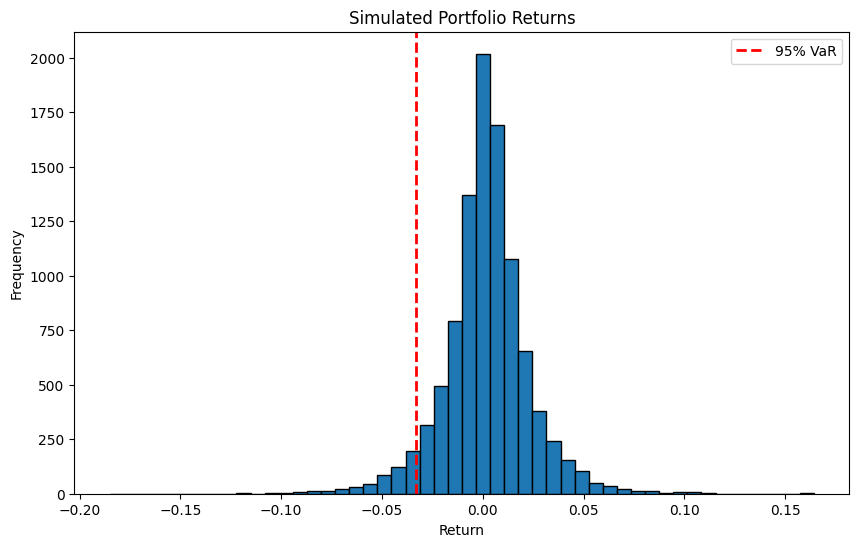

In [162]:

# Plot histogram of simulated portfolio returns - Generalized Gaussian
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, edgecolor='black')
plt.title('Simulated Portfolio Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.axvline(var_95_1, color='r', linestyle='dashed', linewidth=2, label='95% VaR')
plt.legend()
plt.show()

In [159]:
# Calculate the maximum loss with 95% confidence (Value at Risk) for Normal Distribution
var_95_2 = np.percentile(portfolio_returns2, 5)
print(f"Value at Risk (95% confidence): {-var_95_2:.4f}")
print(f"The maximum loss you may have in a day with 95% confidence is {-var_95_2*100:.2f}%")

Value at Risk (95% confidence): 0.0360
The maximum loss you may have in a day with 95% confidence is 3.60%


### Question 2


2.     Assume you are assigned the task of evaluating the stock of Infosys (INFY). To evaluate the stock, you calculate required return using the CAPM. You can assume that the price of Infosys is fairly valued. The following information is available:

·       Expected Annual Nifty return is 10%

·       Beta of INFY is 0.55.

·       Risk free rate 5.3%.

·       The annualised volatility of market return is 15%

Answer the following questions:

a.     Using CAPM, calculate the annual expected return of INFY

b.     If the current market price of Rs 1500/- per share, then what will be the expected price of INFY stock after one year.

c.     Find the annualised volatility of the return of INFY

d.     Assuming INFY return follows Gaussian distribution, what is the probability that after one year the INFY price will be less than Rs. 1500/-?

#### Answers: 


a. Using CAPM, calculate the annual expected return of INFY:

The formula for CAPM is: Expected Return = Risk-Free Rate + Beta * (Expected Market Return - Risk-Free Rate)

Given: Risk-Free Rate = 5.3% Beta = 0.55 Expected Market Return = 10%

Expected Return = 5.3% + 0.55 * (10% - 5.3%) Expected Return = 5.3% + 0.55 * 4.7% Expected Return = 5.3% + 2.585% Expected Return = 7.885%

##### Therefore, the annual expected return of INFY is 7.885%.

----------------------------------------------------------------------------------------------------------------------------

b. If the current market price of Rs 1500/- per share, then what will be the expected price of INFY stock after one year.

To calculate the expected price of INFY stock after one year, we can use the formula: Expected Price = Current Price * (1 + Expected Return)

Given: Current Price = Rs 1500/- Expected Return = 7.885%

Expected Price = Rs 1500 * (1 + 7.885%) Expected Price = Rs 1500 * (1 + 0.07885) Expected Price = Rs 1500 * 1.07885 
##### Ans: Expected Price = Rs 1618.275

Therefore, the expected price of INFY stock after one year is Rs 1618.275.

--------------------------------------------------------------------------------------------------------------------------

c. Find the annualized volatility of the return of INFY.

We can use the relationship between stock volatility and market volatility:
σi = βi * σm (Neglecting correlation p here.)

Where:
σi = Volatility of INFY

βi = Beta of INFY = 0.55

σm = Market volatility = 15%

σi = 0.55 * 15% = 8.25%

##### Ans: The annualized volatility of the return of INFY is 8.25%.

------------------------------------------------------------------------------------------------------------------------------------

d. Assuming INFY return follows a Gaussian distribution, what is the probability that after one year the INFY price will be less than Rs. 1500/-?

Expected return: μ = 0.07885 (7.885% from CAPM)

Volatility: σ = 0.0825 (8.25% as calculated earlier)

Initial Stock Price = 1500 (As Given earlier)

Using the Gaussian distribution approach:

Ln St follows Normal distribution of N(Ln(S0) + (μ - σ^2/2)t / (σ * √t))

P(Price < 1500) = N((ln(1500/1500) - (μ - σ^2/2)) / (σ * √t))

Where N() is the cumulative standard normal distribution function, and t = 1 year.

P(Price < 1500) = N((0 - (0.07885 - 0.0825^2/2)) / (0.0825 * √1))

= N((0 - (0.07885 - 0.003403)) / 0.0825)

= N(-0.07544 / 0.0825)

= N(-0.91450)

≈ 0.18023 or 18.02%

##### Ans: The Probability that the INFY price will be less than 1500 is 18.02%

----------------------------------------------------------------------------------------------------------


### Question 3


3.     The following website contains information about companies listed in NIFTY 50. https://tradebrains.in/nifty-50-companies-list/

Choose first 3 companies from the list.

What will be the prices for both Call Option and Put Option derived from each of three companies’ stocks? Assume,

a.     Risk free interest rate is 6% annually compounded.

b.     You are computing the prices on 1st April 2024.

c.     The Stock price is the last closing price of 31st March 2024.

d.     Expiration date is exactly 3 months from computing date.

e.     The Strike price is 1600.

f.      Additionally: Compute the Delta, Gamma, Vega and Theta for each of the derivatives.

In [24]:
# Pick & Load Bharati Airtel, Adani Ports and Special Economic Zones and NTPC from NSE India
# Companies and their symbols
import yfinance as yf
import numpy as np
import QuantLib as ql
from datetime import datetime



companies = [("Bharati Airtel", "ABBOTINDIA.NS"), 
             ("Adani Ports and Special Economic Zones", "ADANIPORTS.NS"), 
             ("NTPC", "NTPC.NS")]

# Define the date range
start_date = date(2024,3,31)
end_date = date(2024,4,1)

def compute_historical_volatility(stock_data):
    stock_data['Returns'] = stock_data['Close'].pct_change()
    daily_volatility = stock_data['Returns'].std()
    annual_volatility = daily_volatility * np.sqrt(360)  # 252 trading days in a year
    return annual_volatility

# Fetch the stock prices using yfinance
stock_prices = {}
volatilities = {}
for company, stock in companies:
    stock_data = yf.download(stock, end=end_date)
    if not stock_data.empty:
        closing_price = stock_data['Close'][-1]
        volatility = compute_historical_volatility(stock_data)
        stock_prices[stock] = closing_price
        volatilities[stock] = volatility
    else:
        stock_prices[stock] = None
        volatilities[stock] = None

[*********************100%%**********************]  1 of 1 completed
C:\Users\Kaushik Srivatsan\AppData\Local\Temp\ipykernel_28304\531961839.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closing_price = stock_data['Close'][-1]
[*********************100%%**********************]  1 of 1 completed
C:\Users\Kaushik Srivatsan\AppData\Local\Temp\ipykernel_28304\531961839.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closing_price = stock_data['Close'][-1]
[*********************100%%**********************]  1 of 1 completed
C:\Users\Kaushik Srivatsan\AppData\Local\Temp\ipykernel_28304\531961839.py:30: FutureWa

In [25]:
stock_data['Close']


Date
2004-11-05     62.958332
2004-11-08     62.666664
2004-11-09     62.750000
2004-11-10     62.541664
2004-11-11     62.041664
                 ...    
2024-03-21    325.000000
2024-03-22    324.750000
2024-03-26    329.100006
2024-03-27    331.600006
2024-03-28    335.799988
Name: Close, Length: 4789, dtype: float64

In [26]:
volatilities

{'ABBOTINDIA.NS': 0.5495831900210182,
 'ADANIPORTS.NS': 0.5054484955864561,
 'NTPC.NS': 0.3509337891687206}

In [27]:
print("Stock Prices and their volatility as of 31st March 2024:")
for company, symbol in companies:
      print(f"{company}: Price = {stock_prices[symbol]}, Volatility = {volatilities[symbol]}")

Stock Prices and their volatility as of 31st March 2024:
Bharati Airtel: Price = 27120.80078125, Volatility = 0.5495831900210182
Adani Ports and Special Economic Zones: Price = 1341.8499755859375, Volatility = 0.5054484955864561
NTPC: Price = 335.79998779296875, Volatility = 0.3509337891687206


In [32]:
import QuantLib as ql
import yfinance as yf
from datetime import date, datetime
import numpy as np

strike_price = 1600
risk_free_rate = 0.06  # 6%
expiration_date = date(2024,7,1)  # 3 months from 1st April 2024

#date1 = ql.Date(end_date.day, end_date.month, end_date.year)
valuation_date = end_date

expiration_date1 = ql.Date(expiration_date.day, expiration_date.month, expiration_date.year)
valuation_date1 = ql.Date(valuation_date.day, valuation_date.month, valuation_date.year)

ql.Settings.instance().evaluationDate = valuation_date1
def calculate_option_prices_and_greeks(S, K, valuation_date, expiration_date, r, sigma, option_type):
    # Option parameters
    payoff = ql.PlainVanillaPayoff(option_type, K)
    exercise = ql.EuropeanExercise(expiration_date)
    
    # Calculate time to maturity
    day_count = ql.Actual365Fixed()
    calendar = ql.TARGET()
    T = day_count.yearFraction(valuation_date, expiration_date)
    
    # Market data
    spot_handle = ql.QuoteHandle(ql.SimpleQuote(S))
    flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(valuation_date, r, day_count))
    vol_handle = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(valuation_date, calendar, sigma, day_count))
    
    # Black-Scholes process
    bsm_process = ql.BlackScholesMertonProcess(spot_handle, flat_ts, flat_ts, vol_handle)
    
    # European option
    option = ql.VanillaOption(payoff, exercise)
    option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))

    # Option price and Greeks
    price = option.NPV()
    delta = option.delta()
    gamma = option.gamma()
    vega = option.vega()
    theta = option.theta()
    
    return price, delta, gamma, vega, theta

# Calculate for each company
for company, symbol in companies:
    S = stock_prices[symbol]
    sigma = volatilities[symbol]
    if S is None or sigma is None:
        print(f"Data for {company} ({symbol}) is not available.")
        continue
    
    call_price, call_delta, call_gamma, call_vega, call_theta = calculate_option_prices_and_greeks(
        S, strike_price, valuation_date1, expiration_date1, risk_free_rate, sigma, ql.Option.Call)
    put_price, put_delta, put_gamma, put_vega, put_theta = calculate_option_prices_and_greeks(
        S, strike_price, valuation_date1, expiration_date1, risk_free_rate, sigma, ql.Option.Put)

    print(f"\n{company} ({symbol}):")
    print(f"Stock Price: {S:.2f}")
    print(f"Historical Volatility: {sigma:.4f}")
    
    print("\nCall Option:")
    print(f"Price: {call_price:.5f}")
    print(f"Delta: {call_delta:.5f}")
    print(f"Gamma: {call_gamma:.5f}")
    print(f"Vega: {call_vega:.5f}")
    print(f"Theta: {call_theta:.5f}")
    
    print("\nPut Option:")
    print(f"Price: {put_price:.5f}")
    print(f"Delta: {put_delta:.5f}")
    print(f"Gamma: {put_gamma:.5f}")
    print(f"Vega: {put_vega:.5f}")
    print(f"Theta: {put_theta:.5f}")


Bharati Airtel (ABBOTINDIA.NS):
Stock Price: 27120.80
Historical Volatility: 0.5496

Call Option:
Price: 25141.87876
Delta: 0.98515
Gamma: 0.00000
Vega: 0.00000
Theta: 1508.51273

Put Option:
Price: -0.00000
Delta: -0.00000
Gamma: 0.00000
Vega: 0.00000
Theta: -0.00000

Adani Ports and Special Economic Zones (ADANIPORTS.NS):
Stock Price: 1341.85
Historical Volatility: 0.5054

Call Option:
Price: 52.06591
Delta: 0.27978
Gamma: 0.00099
Vega: 223.71414
Theta: -223.64929

Put Option:
Price: 306.38303
Delta: -0.70537
Gamma: 0.00099
Vega: 223.71414
Theta: -208.39026

NTPC (NTPC.NS):
Stock Price: 335.80
Historical Volatility: 0.3509

Call Option:
Price: 0.00000
Delta: 0.00000
Gamma: 0.00000
Vega: 0.00000
Theta: -0.00000

Put Option:
Price: 1245.42971
Delta: -0.98515
Gamma: 0.00000
Vega: 0.00000
Theta: 74.72578
